In [22]:
import urllib.request
import json
import pandas as pd
import requests
import shutil
import os


url = (
    "https://pixabay.com/api/?key=42732485-b4c1847a3529ea910e8e5fdeb&q=animaux&image_type=photo&per_page=100"
)
response = urllib.request.urlopen(url)
responsedata = json.loads(response.read().decode("utf-8"))
responsedata

def download_image(url):

    headers = {"User-Agent": "Mozilla/5.0"}
    request = requests.get(url, allow_redirects=True, headers=headers, stream=True)
    if request.status_code == 200:
        image_link = os.path.basename(url)
        filename = os.path.join("./images/", image_link)
        with open(filename, "wb") as image:
            request.raw.decode_content = True
            shutil.copyfileobj(request.raw, image)
    return request.status_code

array = []

for result in responsedata["hits"]:
    array.append(
        (
            result["id"],
            result["tags"],
            result["largeImageURL"],
            result["imageWidth"],
            result["imageHeight"],
            result["imageSize"],
            result["likes"], 
            result["user"],
            result["largeImageURL"].split('.')[-1]
        )
    )

dataframe = pd.DataFrame(array, columns=["id", "tags", "largeImageURL", "imageWidth","imageHeight","imageSize", "likes", "user", "format"])
dataframe = dataframe.astype(
    dtype={"id": "<U200", "tags": "<U200", "largeImageURL": "<U200","imageWidth": "<U200","imageHeight": "<U200","imageSize": "<U200", "likes": "<U200", "user": "<U200", "format": "<U200"}
)
#dataframe.largeImageURL.apply(download_image)
dataframe


 

,id,tags,largeImageURL,imageWidth,imageHeight,imageSize,likes,user,format
0,715588,"fox, nature, animals",https://pixabay.com/get/ga42403c298f49f9a39a02...,3595,2414,2226561,1505,AlainAudet,jpg
1,430441,"horses, galloping, running",https://pixabay.com/get/gca8a6baaf2e0bf1587fed...,4500,3000,1347483,1520,SorcerySoapHP,jpg
2,591359,"tigers, cub, snow",https://pixabay.com/get/g3f27d3b683d7072aca172...,4342,2798,5424078,1745,Sponchia,jpg
3,2904536,"horses, pair, wild horses",https://pixabay.com/get/gf8621386c5465912e3ba1...,4000,3000,2640822,1588,susannp4,jpg
4,2934720,"cat, kitten, pets",https://pixabay.com/get/gea231365edd629ac3f13e...,3495,2330,1971228,1548,Kirgiz03,jpg
...,...,...,...,...,...,...,...,...,...
95,2222908,"giraffe, head, ossicones",https://pixabay.com/get/g7bf56963e67bebb2b5f7e...,4000,2669,3727985,689,Alexas_Fotos,jpg
96,2045655,"eagle, portrait, wild",https://pixabay.com/get/gc304a800c661fbc4c9a16...,2066,2426,1388406,851,Robert_C,jpg
97,1341881,"wolves, forest, wintry",https://pixabay.com/get/gf0c8cb227ac2c6d1f94a4...,4096,2160,1380594,3163,51581,jpg
98,2107052,"swan, water, white",https://pixabay.com/get/gde02b97cb5e2944394005...,4000,2289,1321269,1277,NoName_13,jpg


On va stocker id, tags, largeImageURL, imageWidth, imageHeight, imageSize, likes, format de l'image en prenant ce qu'il y a après le .; user

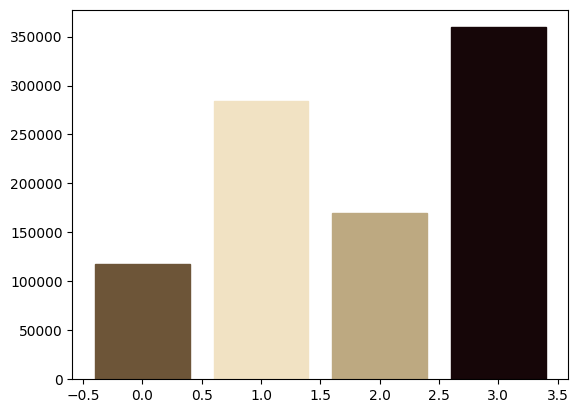

In [2]:
#Test code
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

imgfile = Image.open("./images/g0a7d390874e92d7c4ae52f9845f6f31c19f5d286c89df292b17030ca937cf1c20834db6a0a10087c44beede67fe3282d25ef085d23f5efef5bc98417707299be_1280.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
clusters = KMeans(n_clusters=4, n_init=2)
clusters.fit(numarray)
npbins = numpy.arange(0, 5)
histogram = numpy.histogram(clusters.labels_, bins=npbins)
labels = numpy.unique(clusters.labels_)
barlist = plot.bar(labels, histogram[0])
for i in range(4):
    barlist[i].set_color(
        "#%02x%02x%02x"
        % (
            math.ceil(clusters.cluster_centers_[i][0]),
            math.ceil(clusters.cluster_centers_[i][1]),
            math.ceil(clusters.cluster_centers_[i][2]),
        )
    )
plot.show()